Xinference supports multimodal models, such as: qwen-vl-chat. This notebook shows how to chat with large vision language model.

# Preparation

First, you need to install Xinference:
```shell
pip install xinference
```

Then, start the Xinference server by the following command:
```shell
xinference
```

The Xinference server will be started:

```shell
2023-12-29 06:14:53,568 xinference.core.supervisor 9364 INFO     Xinference supervisor 0.0.0.0:21679 started
2023-12-29 06:14:53,612 xinference.core.worker 9364 INFO     Xinference worker 0.0.0.0:21679 started
2023-12-29 06:14:53,613 xinference.core.worker 9364 INFO     Purge cache directory: /home/codingl2k1/.xinference/cache
2023-12-29 06:14:57,079 xinference.api.restful_api 9197 INFO     Starting Xinference at endpoint: http://0.0.0.0:9997
```

Finally, we launch a ChatGLM3 model for tool calls.
```shell
xinference launch -u my_vl_model -n qwen-vl-chat -f pytorch -t multimodal
```



# Chat with large vision language model

Xinference fully supports openai's image messages in both URL and base64 formats. In this case, we encode an image into base64 bytes to chat with Qwen-VL-Chat.

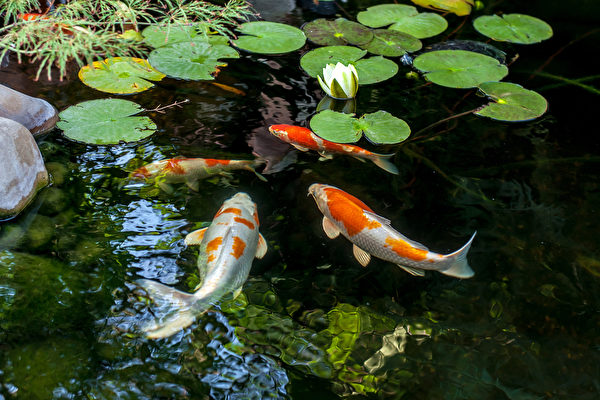

In [1]:
import io
import requests
from PIL import Image

response = requests.get("http://i.epochtimes.com/assets/uploads/2020/07/shutterstock_675595789-600x400.jpg")

img = Image.open(io.BytesIO(response.content))
img

In [2]:
import openai
import base64

b64_img = base64.b64encode(response.content).decode("utf-8")

messages=[
    {
        "role": "user",
        "content": [
            {"type": "text", "text": "图中有几条鱼？"},
            {
                "type": "image_url",
                "image_url": {
                    "url": f"data:image/jpeg;base64,{b64_img}",
                    # Also, you can put an URL directly.
                    # "url": f"http://i.epochtimes.com/assets/uploads/2020/07/shutterstock_675595789-600x400.jpg",
                },
            },
        ],
    }
]

client = openai.Client(api_key="not empty", base_url=f"http://0.0.0.0:9997/v1")
completion = client.chat.completions.create(
    model="my_vl_model",
    messages=messages,
)
completion

ChatCompletion(id='chatf9fbc294-a621-11ee-9bd4-9309605a4653', choices=[Choice(finish_reason='stop', index=0, message=ChatCompletionMessage(content='图中有四条鱼。', role='assistant', function_call=None, tool_calls=None))], created=1703837535, model='my_vl_model', object='chat.completion', system_fingerprint=None, usage=CompletionUsage(completion_tokens=-1, prompt_tokens=-1, total_tokens=-1))

# Conclusion

Xinference is a robust inference tool that supports not only tool calls but also vision language models, providing inference capabilities similar to those of GPT-4V.